Championship

In [1]:
dbname='australia18.db'

In [71]:
import sqlite3

import pandas as pd

conn = sqlite3.connect(dbname)


In [72]:
q="SELECT name FROM sqlite_master WHERE type = 'table';"
pd.read_sql(q,conn)

,name
0,itinerary_event
1,itinerary_legs
2,itinerary_sections
3,itinerary_stages
4,itinerary_controls
5,startlists
6,startlist_classes
7,penalties
8,retirements
9,stagewinners


In [73]:
q="SELECT * FROM championship_lookup WHERE _codeClass='WRC' AND _codeTyp='Driver'"
pd.read_sql(q,conn).iloc[0]

championshipId                                                  6
fieldFiveDescription                             TyreManufacturer
fieldFourDescription                                 Manufacturer
fieldOneDescription                                     FirstName
fieldThreeDescription                                 CountryISO3
fieldTwoDescription                                      LastName
name                     FIA World Rally Championship for Drivers
seasonId                                                        1
type                                                       Person
_codeClass                                                    WRC
_codeTyp                                                   Driver
Name: 0, dtype: object

In [74]:
q="SELECT * FROM championship_results LIMIT 5;"
pd.read_sql(q,conn)

,championshipEntryId,championshipId,dropped,eventId,pointsBreakdown,position,publishedStatus,status,totalPoints
0,31,6,0,26,25+1,1,Published,Finished,26
1,31,6,0,27,1+4,10,Published,Finished,5
2,31,6,0,28,25+0,1,Published,Finished,25
3,31,6,0,29,25+3,1,Published,Finished,28
4,31,6,0,30,12+4,4,Published,Finished,16


In [75]:
q="SELECT * FROM championship_entries_codrivers LIMIT 5;"
pd.read_sql(q,conn)

,championshipEntryId,championshipId,entrantId,ManufacturerTyre,Manufacturer,FirstName,CountryISO3,CountryISO2,LastName,manufacturerId,personId,tyreManufacturer
0,52,11,None,,,Pavel,CZE,None,DRESLER,None,565,None
1,53,11,None,,,Louis,BEL,None,LOUKA,None,571,None
2,54,11,None,,,Mikko,FIN,None,MARKKULA,None,567,None
3,55,11,None,,,Pieter,BEL,None,TSJOEN,None,569,None
4,56,11,None,,,Benjamin,FRA,None,VEILLAS,None,531,None


In [76]:
q="SELECT * FROM championship_entries_manufacturers LIMIT 5;"
pd.read_sql(q,conn)

,championshipEntryId,championshipId,entrantId,Name,LogoFileName,Manufacturer,manufacturerId,personId,tyreManufacturer
0,41,8,100,CITROEN TOTAL ABU DHABI WRT,citroen,Citroen,13,None,None
1,42,8,94,M-SPORT FORD WORLD RALLY TEAM,ford,Ford,26,None,None
2,43,8,1,HYUNDAI SHELL MOBIS WRT,hyundai,Hyundai,33,None,None
3,44,8,91,TOYOTA GAZOO RACING WRT,toyota,Toyota,84,None,None
4,58,9,89,M-Sport World Rally Team,ford,Ford,26,None,None


In [77]:
q="SELECT * FROM championship_rounds LIMIT 5;"
pd.read_sql(q,conn)

,championshipId,eventId,order
0,6,26,1
1,6,27,2
2,6,28,3
3,6,29,4
4,6,30,5


In [78]:
q="SELECT * FROM championship_events LIMIT 5;"
pd.read_sql(q,conn).iloc[1]

categories                                                        None
clerkOfTheCourse                                                  None
country.countryId                                                  215
country.iso2                                                        SE
country.iso3                                                       SWE
country.name                                                    Sweden
countryId                                                          215
eventId                                                             27
finishDate                                                  2018-02-18
location                                                        Sweden
mode                                                             Rally
name                                                      Rally Sweden
organiserUrl                                                          
slug                                                 rally-sweden-2018
startD

In [79]:
q="SELECT * FROM championship_entries_drivers WHERE LastName='OGIER';"
pd.read_sql(q,conn).iloc[0]

championshipEntryId           31
championshipId                 6
entrantId                   None
ManufacturerTyre        Michelin
Manufacturer                ford
FirstName              Sébastien
CountryISO3                  FRA
CountryISO2                 None
LastName                   OGIER
manufacturerId                26
personId                     670
tyreManufacturer        Michelin
Name: 0, dtype: object

In [80]:

q='''SELECT ce.LastName, cr.pointsBreakdown, cr.position, cr.status, cr.totalPoints,
cv.name, cv.startDate ,cv.surfaces, co.`order` AS event, sl.`driver.code` drivercode
FROM championship_entries_drivers AS ce, (SELECT * FROM championship_rounds) co,
(SELECT * FROM championship_results) cr, (SELECT * FROM championship_events) cv ,
(SELECT * FROM championship_lookup WHERE _codeClass='WRC' AND _codeTyp='Driver') cl ,
(SELECT * FROM startlists) sl
WHERE  
sl.`driver.personId`=ce.personId
AND ce.championshipId = cr.championshipId AND ce.championshipEntryId = cr.championshipEntryId
AND co.championshipId = cr.championshipId AND cl.championshipId = cr.championshipId
AND cr.eventId = cv.eventId AND cr.championshipId = co.championshipId AND cr.eventId = co.eventId 
AND cr.status!='DidNotEnter'
order BY event ASC;'''
#LastName='OGIER' AND
df = pd.read_sql(q,conn)
df

,LastName,pointsBreakdown,position,status,totalPoints,name,startDate,surfaces,event,driver.code
0,OGIER,25+1,1,Finished,26,Rallye Monte-Carlo,2018-01-25,,1,OGI
1,TÄNAK,18+0,2,Finished,18,Rallye Monte-Carlo,2018-01-25,,1,TÄN
2,LATVALA,15+2,3,Finished,17,Rallye Monte-Carlo,2018-01-25,,1,LAT
3,LAPPI,6+0,7,Finished,6,Rallye Monte-Carlo,2018-01-25,,1,LAP
4,MEEKE,12+5,4,Finished,17,Rallye Monte-Carlo,2018-01-25,,1,MEE
5,EVANS,8+0,6,Finished,8,Rallye Monte-Carlo,2018-01-25,,1,EVA
6,NEUVILLE,10+4,5,Finished,14,Rallye Monte-Carlo,2018-01-25,,1,NEU
7,BREEN,2+0,9,Finished,2,Rallye Monte-Carlo,2018-01-25,,1,BRE
8,MIKKELSEN,0+3,14,Finished,3,Rallye Monte-Carlo,2018-01-25,,1,MIK
9,SUNINEN,0,18,Finished,0,Rallye Monte-Carlo,2018-01-25,,1,SUN


In [81]:
df['cumTotal'] = df.groupby(by=['LastName'])['totalPoints'].cumsum()
df

,LastName,pointsBreakdown,position,status,totalPoints,name,startDate,surfaces,event,driver.code,cumTotal
0,OGIER,25+1,1,Finished,26,Rallye Monte-Carlo,2018-01-25,,1,OGI,26
1,TÄNAK,18+0,2,Finished,18,Rallye Monte-Carlo,2018-01-25,,1,TÄN,18
2,LATVALA,15+2,3,Finished,17,Rallye Monte-Carlo,2018-01-25,,1,LAT,17
3,LAPPI,6+0,7,Finished,6,Rallye Monte-Carlo,2018-01-25,,1,LAP,6
4,MEEKE,12+5,4,Finished,17,Rallye Monte-Carlo,2018-01-25,,1,MEE,17
5,EVANS,8+0,6,Finished,8,Rallye Monte-Carlo,2018-01-25,,1,EVA,8
6,NEUVILLE,10+4,5,Finished,14,Rallye Monte-Carlo,2018-01-25,,1,NEU,14
7,BREEN,2+0,9,Finished,2,Rallye Monte-Carlo,2018-01-25,,1,BRE,2
8,MIKKELSEN,0+3,14,Finished,3,Rallye Monte-Carlo,2018-01-25,,1,MIK,3
9,SUNINEN,0,18,Finished,0,Rallye Monte-Carlo,2018-01-25,,1,SUN,0


In [82]:
%matplotlib inline

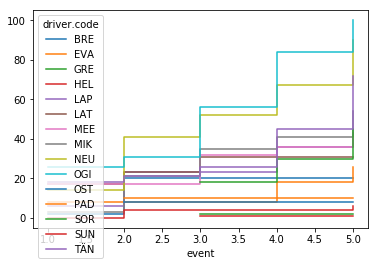

In [83]:
df.pivot(index='event', columns='drivercode', values='cumTotal').fillna(method='ffill').plot(drawstyle="steps-post")
#.fillna(0,limit=1)#.plot()

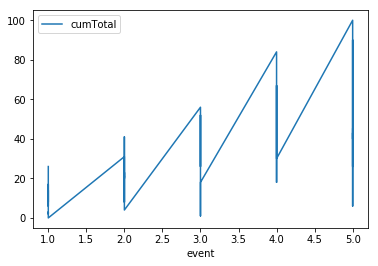

In [84]:

df.plot(x='event',y='cumTotal')